# LFA : Colorectal cancer biomarkers detection
*Alexandra Korukova, Samuel Mayor, Arnold Von Bauer Gauss*

## Introduction
In this notebook, we will use the data gathered in the first part of the project (See BBC notebook) to create models with Trefle. We will then select the best model based on different criterias.

To explore and select parameters for the models, we followed the same method as the one presented in the laboratory 060 of LFA.

### Imports

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

import json
import numpy as np
import random
import math

import os

from pprint import pprint
from collections import Counter
from matplotlib.ticker import MaxNLocator
from itertools import tee



from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from trefle.fitness_functions.output_thresholder import round_to_cls
from trefle.trefle_classifier import TrefleClassifier

from trefle_engine import TrefleFIS

import libraries.measures_calculation
import libraries.trefle_project
import libraries.interpretability_methods
import libraries.interpretability_plots
import libraries.results_plot
from libraries.model_var import ModelVar
from libraries.model_train_cv import *

### View the data

In [68]:
DATA_PATH = './data/rfe_result.csv'
TEST_DATA = './data/test_data.csv'
TRAIN_DATA = './data/train_data.csv'

In [69]:

sig_genes_df = pd.read_csv(DATA_PATH)
sig_genes_df

,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1316_at,1320_at,1438_at,1487_at,...,210783_x_at,211377_x_at,211461_at,211581_x_at,211585_at,211602_s_at,211616_s_at,212043_at,212612_at,label
0,GSM537330,11.182047,8.654008,11.595814,10.788859,9.970058,10.309465,10.792290,12.204936,9.631744,...,5.591213,6.227322,7.392752,6.224789,5.689202,8.825054,4.577454,8.677586,9.524119,1
1,GSM537331,12.058899,8.570928,8.078051,10.841658,8.926295,8.541125,10.285925,11.923967,8.738657,...,9.389268,6.628291,9.206933,6.919134,5.447374,7.733069,5.683601,9.253718,10.642914,1
2,GSM537332,12.207601,8.881271,12.003163,11.154477,9.328660,9.705434,10.145887,12.702366,9.278910,...,4.672494,5.974764,8.415521,6.363706,5.779687,8.974140,4.366215,9.455260,9.140913,1
3,GSM537333,10.107762,9.669961,11.520907,9.931038,8.992218,9.969553,9.541109,11.430610,9.143194,...,9.102810,6.592707,8.624148,5.925591,6.856469,11.264110,5.386561,9.393032,9.602142,1
4,GSM537334,11.833478,8.543258,9.102151,10.329359,9.553853,9.499729,10.198663,10.222863,9.413488,...,7.871905,7.019065,8.827481,5.830367,5.798082,7.738825,6.570926,8.909785,10.463819,1
5,GSM537335,12.059512,9.114891,9.414645,11.481841,9.314749,10.099204,11.132652,9.454139,9.404365,...,8.267092,7.850446,8.996064,6.575039,5.345359,8.087454,6.809127,9.028036,9.936007,1
6,GSM537336,7.525914,8.076111,12.369972,10.061145,7.938799,9.617497,8.953277,11.710476,7.626421,...,4.811251,7.139248,8.729924,7.404632,7.544272,10.182738,10.033208,8.806879,7.929835,1
7,GSM537337,10.954483,8.840053,9.808922,10.429094,8.758957,9.050508,10.164506,11.475195,8.652625,...,5.516150,6.856877,8.231141,7.793436,5.582626,6.426628,5.495324,9.879559,10.117348,1
8,GSM537338,12.306071,8.421929,8.836539,10.652797,8.953626,9.639117,10.427685,11.314865,8.829740,...,7.816269,6.968128,8.239822,6.885398,5.907605,6.889094,6.094550,8.703074,10.104241,1
9,GSM537339,10.414325,8.881041,10.666415,10.564276,8.987484,9.424550,10.801880,9.897127,9.023729,...,4.764323,7.206351,9.338845,7.418386,5.826993,7.994608,6.430504,8.719381,10.435354,1


### Extract data (X) and labels (y)  
And split into train and test sets

In [70]:
X = sig_genes_df.iloc[:, 1:-1]
y = sig_genes_df.iloc[:,-1]

In [71]:
# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.33)

In [72]:
plt.hist(y_train, bins='auto', label='Train')

plt.hist(y_test, bins='auto', label='Test')
plt.title("Train test Split")
plt.xlabel('Classes')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [73]:
y_train_modify = np.reshape(y_train, (-1, 1))
train_dataset = np.append(X_train, y_train_modify, axis=1)

y_test_modify = np.reshape(y_test, (-1, 1))
test_dataset = np.append(X_test, y_test_modify, axis=1)

np.savetxt(TRAIN_DATA, train_dataset, delimiter=",")
np.savetxt(TEST_DATA, test_dataset, delimiter=",")

### First parameters setting
Here we choose the basic parameters such as the number of rules, the number of variables per rules and the number of generations.

In [74]:
clf = TrefleClassifier(
    n_rules=4,
    n_classes_per_cons=[2],  # there is only 1 consequent with 2 classes
    n_labels_per_mf=3,  # use 3 labels LOW, MEDIUM, HIGH
    default_cons=[0],  # default rule yield the class 0
    n_max_vars_per_rule=3,  
    
    n_generations=250,
    verbose=False,
)

In [75]:
# Create folders for experiences
# Create target Directory if don't exist
if not os.path.exists('experiences/'):
    os.mkdir('experiences/')
    os.mkdir('experiences/sen_spe/')
    os.mkdir('experiences/rmse_v2/')
    os.mkdir('experiences/n_rules/')
    os.mkdir('experiences/n_rules_nvar/')
    os.mkdir('experiences/n_rules_nvar_tuning/')
    os.mkdir('experiences/all_models/')



### Fitness function
In this cell we define the fitness function that will be used to tell the algorithm how to appraise a model.  

We also set the number of folds to use for the cross-validation. We set it to 5 only because our dataset is not large enough to be able to be separated in more folds. Setting it to 10 folds raised an error when a fold was containing only positive or negative patients.

In [76]:
global weigh_senSpe


############## Fitness function
def fit (y_true, y_pred):
    global weigh_senSpe
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    score = weigh_senSpe * sensitivity + (1.0 - weigh_senSpe) * specificity
    return score

clf.fitness_function=fit
###############


#Perform Cross-validation
k_fold_number = 5
cv_kf = KFold(n_splits=k_fold_number, random_state=42, shuffle=True)
array_index_train_test = cv_kf.split(X_train)
array_index_train_test, array_index_train_test_copy = tee(array_index_train_test)

### First experience : sensitivity and specificity
In this experience, we explore a range of sensitivity weight from 0 to 1 with a step of 0.2. It allows us to find the best weight for the sensitivity/specificity.  

In [10]:
#--------------------
path_save_results_directory = 'experiences/sen_spe/'
#file name that will contain the results for each model create (so for each fold)
file_results_dv = 'values_sen_spe_weight.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_senSpe_2'
#--------------------

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose which values for the number of rules and maximum variables per 
#rule we want to test along our experience
vec_weight = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

#For the moment we use these values for the number of rules and vars per rule
number_rule = 5
var_per_rule = 5

for weight_actual in vec_weight:
    model_train_obj.number_rule = number_rule
    model_train_obj.var_per_rule = var_per_rule
    model_train_obj.weight_actual = weight_actual
    weigh_senSpe = weight_actual
    model_train_obj.execute_cv()

save end
save end
save end
save end
save end
(5, 7)
(5, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]]
[['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_0_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_1_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_2_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_3_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_4_rule_5_var_per_rule_5.ftt']]
save end
save end
save end
save end
save end
(10, 7)
(10, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  

save end
save end
save end
save end
save end
(30, 7)
(30, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  0. 15.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  0. 15.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  4.  1.  0. 15.]
 [ 5.  5.  1.  0.  2.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  3.  1.  0. 15.]]
[['exper

In [77]:
#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_sen_spe_weight.csv')
#--------------------


dataframe_results.columns = ['N rule', 'N var per rule','Weight', 'CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']

In [78]:
#Plot all values
vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScoresWeigh(dataframe_results)


,Sensitivity,Specificity
Weight,,
0.0,0.026667,1.00
0.2,0.986667,0.90
0.4,1.000000,0.95
0.6,0.973333,1.00
0.8,0.986667,0.90
1.0,1.000000,0.49


[1.0, 0.9, 0.95, 1.0, 0.9, 0.49000000000000005]


<IPython.core.display.Javascript object>


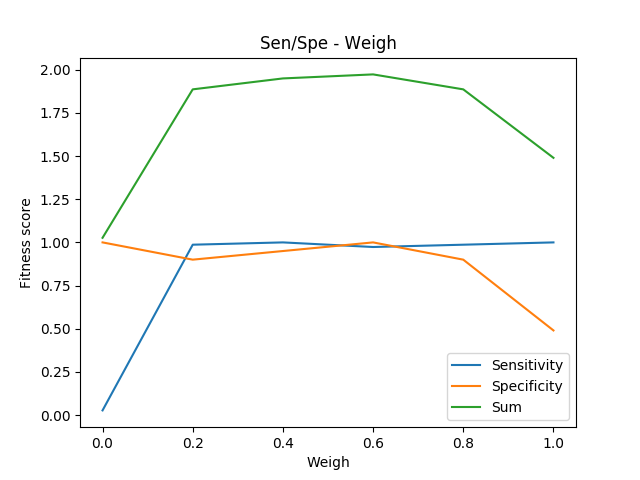

In [79]:
dataframe_results = libraries.interpretability_methods.getMeanSenSpeByWeight(vec_values_sen_spe_models)
display(dataframe_results)

libraries.interpretability_plots.plotSenSpeWeigh(dataframe_results, 'Sen/Spe - Weigh')


![](./img/senSpe.png)

The plot above show very good results with a peak fitness score between 0.4 and 0.6 sensitivity weight. We chose to keep the value 0.6 for the subsequent experiences.

### RMSE
Here we will see if the results are improving by changing the RMSE weight from 0 to 1. We expect it not to have a lot of impact because of the quality of the results without it.

In [ ]:
global weigh_RMSE

##############fitness function
def fit (y_true, y_pred):
    global weigh_RMSE
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    rmse = mean_squared_error(y_true, y_pred)
  
    weight_sen = 0.6 * (1.0 - weigh_RMSE)
    weight_spe = 0.4 * (1.0 - weigh_RMSE)
    
    score = weight_sen * sensitivity + weight_spe * specificity + weigh_RMSE * math.pow(2, -rmse)
    return score

clf.fitness_function=fit

#--------------------
path_save_results_directory = 'experiences/rmse_v2/'
file_results_dv = 'values_rmse_weight_v2.csv'
experience_value_name = 'exps_lab_lfa_rmse_v2_rmse'
#--------------------

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)

#--------------------
vec_weight = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
number_rule = 5
var_per_rule = 5
#--------------------

for weight_actual in vec_weight:
    model_train_obj.number_rule = number_rule
    model_train_obj.var_per_rule = var_per_rule
    model_train_obj.weight_actual = weight_actual
    
    weigh_RMSE = weight_actual
    model_train_obj.execute_cv()

In [80]:
#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_rmse_weight_v2.csv')
#--------------------

#dataframe_results_c = pd.read_csv('values_w.csv')
dataframe_results.columns = ['N rule', 'N var per rule','Weight', 'CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']

In [81]:
#Plot all values
vec_values_sen_spe_models_w_rmse = libraries.interpretability_methods.getSenSpeValuesByScoresWeigh(dataframe_results)

,Sensitivity,Specificity
Weight,,
0.0,0.964444,1.00
0.2,0.986667,0.95
0.4,0.988889,0.90
0.6,0.973333,0.90
0.8,0.986667,0.90
1.0,0.975556,0.95


[1.0, 0.95, 0.9, 0.9, 0.9, 0.95]


<IPython.core.display.Javascript object>


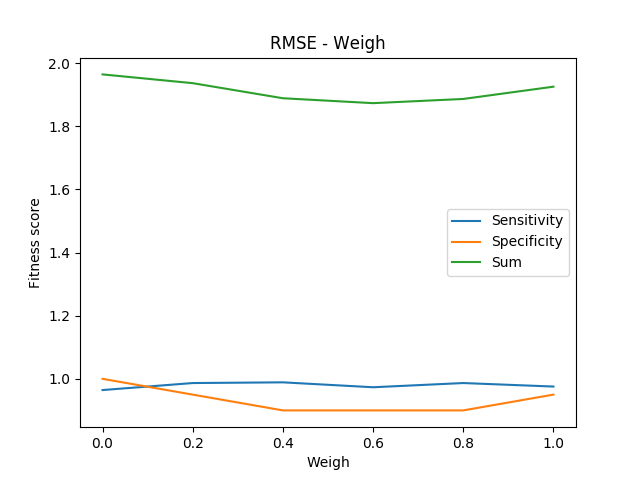

In [82]:
dataframe_results = libraries.interpretability_methods.getMeanSenSpeByWeight(vec_values_sen_spe_models_w_rmse)
display(dataframe_results)

libraries.interpretability_plots.plotSenSpeWeigh(dataframe_results, 'RMSE - Weigh')

![](./img/RMSE.png)

As expected, adding weight to RMSE doesn't yield better results as it goes above 0.1. We chose to select a value of 0.1 for the RMSE as it seems to improve a bit the result.

### Number of rules
After setting the previously chosen parameters in the fitness function, we explored the number of rules. We chose a classic range between 3 and 10.

In [36]:
##############fitness function
def fit (y_true, y_pred):
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    rmse = mean_squared_error(y_true, y_pred)
    
#--------------------
    weigh_RMSE = 0.1
    weight_sen = 0.6 * (1.0 - weigh_RMSE)
    weight_spe = 0.4 * (1.0 - weigh_RMSE)
#--------------------
    score = weight_sen * sensitivity + weight_spe * specificity + weigh_RMSE * math.pow(2, -rmse)
    return score

clf.fitness_function=fit
###############

#Path where you want to save yours models
path_save_results_directory = 'experiences/n_rules/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules'

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose wich values for the number of rules and maximum variable per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the repport')
#--------------------
rules_number_vec = [3, 5, 8, 10]
var_per_rule_fix = 5
#--------------------

for qty_of_rule in rules_number_vec:
    model_train_obj.number_rule = qty_of_rule
    model_train_obj.var_per_rule = var_per_rule_fix
    model_train_obj.execute_cv()

save end
save end
save end
save end
save end
(5, 7)
(5, 1)
[[ 3.  5.  0.  5.  0.  1. 14.]
 [ 3.  5.  1.  2.  0.  0. 18.]
 [ 3.  5.  2.  1.  1.  2. 16.]
 [ 3.  5.  3.  4.  0.  1. 15.]
 [ 3.  5.  4.  4.  0.  0. 15.]]
[['experiences/n_rules/exps_lab_lfa_number_of_rules_conf_A_CV_0_rule_3_var_per_rule_5.ftt']
 ['experiences/n_rules/exps_lab_lfa_number_of_rules_conf_A_CV_1_rule_3_var_per_rule_5.ftt']
 ['experiences/n_rules/exps_lab_lfa_number_of_rules_conf_A_CV_2_rule_3_var_per_rule_5.ftt']
 ['experiences/n_rules/exps_lab_lfa_number_of_rules_conf_A_CV_3_rule_3_var_per_rule_5.ftt']
 ['experiences/n_rules/exps_lab_lfa_number_of_rules_conf_A_CV_4_rule_3_var_per_rule_5.ftt']]
save end
save end
save end
save end
save end
(10, 7)
(10, 1)
[[ 3.  5.  0.  5.  0.  1. 14.]
 [ 3.  5.  1.  2.  0.  0. 18.]
 [ 3.  5.  2.  1.  1.  2. 16.]
 [ 3.  5.  3.  4.  0.  1. 15.]
 [ 3.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  0. 15.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  1.  1.  1. 17.]
 [ 5.  5.  3.  

,N rule,N var per rule,acc,f1,sen,spe
0,3.0,5.0,0.95,0.969509,0.951944,0.90
1,5.0,5.0,0.97,0.982828,0.988889,0.85
2,8.0,5.0,0.98,0.987389,0.975556,1.00
3,10.0,5.0,0.98,0.987698,0.986667,0.90


[0.9, 0.85, 1.0, 0.9]


<IPython.core.display.Javascript object>


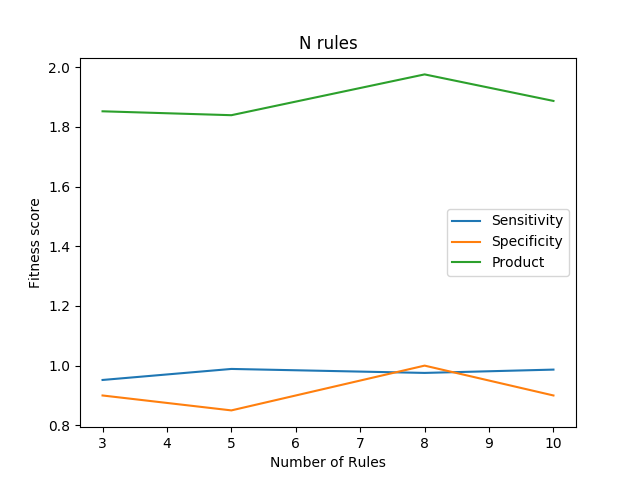

In [83]:
#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_number_of_rules.csv')
#--------------------

#dataframe_results_c = pd.read_csv('values_w.csv')
dataframe_results.head()

param_a_designation = 'nb of rules'
param_b_designation = 'nb of var per rule'

vec_measures = ['acc', 'f1', 'sen', 'spe']



test_data = dataframe_results.iloc[:,0:2]


data_frame_treated = libraries.trefle_project.treatmentResultsValues(dataframe_results, param_a_designation, param_b_designation, vec_measures)
data_frame_treated.columns = ['N rule', 'N var per rule', 'acc', 'f1', 'sen', 'spe']
display(data_frame_treated)



libraries.interpretability_plots.plotSenSpeNRules(data_frame_treated, 'N rules')

![](./img/nRules.png)

These results show clearly better results around 8 rules. In the next experience, we will try to refine this by exploring the range between 7 and 9.

### Number of variables per rule and number of rules refining
This next experience will allow us to choose a final value for the number of rules as well as to explore a first range of number of variables per rule.

In [38]:
#Var per rule and number of rules


#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/n_rules_nvar/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules_nvar.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules_var'
#--------------------


model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)



#Here we can choose wich values for the number of rules and maximum variable per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the repport')
#--------------------
rules_number_vec = [7,8,9]
var_per_rule_vec = [2,3,5,7]
#--------------------

for variation_a in rules_number_vec:
    for variation_b in var_per_rule_vec:
        model_train_obj.number_rule = variation_a
        model_train_obj.var_per_rule = variation_b
        model_train_obj.execute_cv()

save end
save end
save end
save end
save end
(5, 7)
(5, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]]
[['experiences/n_rules_nvar/exps_lab_lfa_number_of_rules_var_conf_A_CV_0_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar/exps_lab_lfa_number_of_rules_var_conf_A_CV_1_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar/exps_lab_lfa_number_of_rules_var_conf_A_CV_2_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar/exps_lab_lfa_number_of_rules_var_conf_A_CV_3_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar/exps_lab_lfa_number_of_rules_var_conf_A_CV_4_rule_7_var_per_rule_2.ftt']]
save end
save end
save end
save end
save end
(10, 7)
(10, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]
 [ 7.  3.  0.  5.  0.  0. 15.]
 [ 7.  3.  1.  2.  0.  0. 18.]
 

save end
save end
save end
save end
save end
(30, 7)
(30, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]
 [ 7.  3.  0.  5.  0.  0. 15.]
 [ 7.  3.  1.  2.  0.  0. 18.]
 [ 7.  3.  2.  2.  0.  0. 18.]
 [ 7.  3.  3.  4.  0.  0. 16.]
 [ 7.  3.  4.  4.  0.  0. 15.]
 [ 7.  5.  0.  5.  0.  0. 15.]
 [ 7.  5.  1.  1.  1.  0. 18.]
 [ 7.  5.  2.  1.  1.  0. 18.]
 [ 7.  5.  3.  4.  0.  0. 16.]
 [ 7.  5.  4.  4.  0.  0. 15.]
 [ 7.  7.  0.  5.  0.  0. 15.]
 [ 7.  7.  1.  2.  0.  0. 18.]
 [ 7.  7.  2.  2.  0.  0. 18.]
 [ 7.  7.  3.  4.  0.  0. 16.]
 [ 7.  7.  4.  4.  0.  0. 15.]
 [ 8.  2.  0.  5.  0.  0. 15.]
 [ 8.  2.  1.  2.  0.  0. 18.]
 [ 8.  2.  2.  1.  1.  0. 18.]
 [ 8.  2.  3.  4.  0.  0. 16.]
 [ 8.  2.  4.  4.  0.  0. 15.]
 [ 8.  3.  0.  5.  0.  0. 15.]
 [ 8.  3.  1.  2.  0.  0. 18.]
 [ 8.  3.  2.  2.  0.  0. 18.]
 [ 8.  3.  3.  4.  0.  0. 16.]
 [ 8.  3.  4.  4.  0.  0. 15.]]
[['exper

save end
save end
save end
save end
save end
(40, 7)
(40, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]
 [ 7.  3.  0.  5.  0.  0. 15.]
 [ 7.  3.  1.  2.  0.  0. 18.]
 [ 7.  3.  2.  2.  0.  0. 18.]
 [ 7.  3.  3.  4.  0.  0. 16.]
 [ 7.  3.  4.  4.  0.  0. 15.]
 [ 7.  5.  0.  5.  0.  0. 15.]
 [ 7.  5.  1.  1.  1.  0. 18.]
 [ 7.  5.  2.  1.  1.  0. 18.]
 [ 7.  5.  3.  4.  0.  0. 16.]
 [ 7.  5.  4.  4.  0.  0. 15.]
 [ 7.  7.  0.  5.  0.  0. 15.]
 [ 7.  7.  1.  2.  0.  0. 18.]
 [ 7.  7.  2.  2.  0.  0. 18.]
 [ 7.  7.  3.  4.  0.  0. 16.]
 [ 7.  7.  4.  4.  0.  0. 15.]
 [ 8.  2.  0.  5.  0.  0. 15.]
 [ 8.  2.  1.  2.  0.  0. 18.]
 [ 8.  2.  2.  1.  1.  0. 18.]
 [ 8.  2.  3.  4.  0.  0. 16.]
 [ 8.  2.  4.  4.  0.  0. 15.]
 [ 8.  3.  0.  5.  0.  0. 15.]
 [ 8.  3.  1.  2.  0.  0. 18.]
 [ 8.  3.  2.  2.  0.  0. 18.]
 [ 8.  3.  3.  4.  0.  0. 16.]
 [ 8.  3.  4.  4.  0.  0. 15.]
 [ 8.  5.

save end
save end
save end
save end
save end
(50, 7)
(50, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]
 [ 7.  3.  0.  5.  0.  0. 15.]
 [ 7.  3.  1.  2.  0.  0. 18.]
 [ 7.  3.  2.  2.  0.  0. 18.]
 [ 7.  3.  3.  4.  0.  0. 16.]
 [ 7.  3.  4.  4.  0.  0. 15.]
 [ 7.  5.  0.  5.  0.  0. 15.]
 [ 7.  5.  1.  1.  1.  0. 18.]
 [ 7.  5.  2.  1.  1.  0. 18.]
 [ 7.  5.  3.  4.  0.  0. 16.]
 [ 7.  5.  4.  4.  0.  0. 15.]
 [ 7.  7.  0.  5.  0.  0. 15.]
 [ 7.  7.  1.  2.  0.  0. 18.]
 [ 7.  7.  2.  2.  0.  0. 18.]
 [ 7.  7.  3.  4.  0.  0. 16.]
 [ 7.  7.  4.  4.  0.  0. 15.]
 [ 8.  2.  0.  5.  0.  0. 15.]
 [ 8.  2.  1.  2.  0.  0. 18.]
 [ 8.  2.  2.  1.  1.  0. 18.]
 [ 8.  2.  3.  4.  0.  0. 16.]
 [ 8.  2.  4.  4.  0.  0. 15.]
 [ 8.  3.  0.  5.  0.  0. 15.]
 [ 8.  3.  1.  2.  0.  0. 18.]
 [ 8.  3.  2.  2.  0.  0. 18.]
 [ 8.  3.  3.  4.  0.  0. 16.]
 [ 8.  3.  4.  4.  0.  0. 15.]
 [ 8.  5.

save end
save end
save end
save end
save end
(60, 7)
(60, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  2.  0.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]
 [ 7.  3.  0.  5.  0.  0. 15.]
 [ 7.  3.  1.  2.  0.  0. 18.]
 [ 7.  3.  2.  2.  0.  0. 18.]
 [ 7.  3.  3.  4.  0.  0. 16.]
 [ 7.  3.  4.  4.  0.  0. 15.]
 [ 7.  5.  0.  5.  0.  0. 15.]
 [ 7.  5.  1.  1.  1.  0. 18.]
 [ 7.  5.  2.  1.  1.  0. 18.]
 [ 7.  5.  3.  4.  0.  0. 16.]
 [ 7.  5.  4.  4.  0.  0. 15.]
 [ 7.  7.  0.  5.  0.  0. 15.]
 [ 7.  7.  1.  2.  0.  0. 18.]
 [ 7.  7.  2.  2.  0.  0. 18.]
 [ 7.  7.  3.  4.  0.  0. 16.]
 [ 7.  7.  4.  4.  0.  0. 15.]
 [ 8.  2.  0.  5.  0.  0. 15.]
 [ 8.  2.  1.  2.  0.  0. 18.]
 [ 8.  2.  2.  1.  1.  0. 18.]
 [ 8.  2.  3.  4.  0.  0. 16.]
 [ 8.  2.  4.  4.  0.  0. 15.]
 [ 8.  3.  0.  5.  0.  0. 15.]
 [ 8.  3.  1.  2.  0.  0. 18.]
 [ 8.  3.  2.  2.  0.  0. 18.]
 [ 8.  3.  3.  4.  0.  0. 16.]
 [ 8.  3.  4.  4.  0.  0. 15.]
 [ 8.  5.

In [140]:
#play with the results of the differents executions
data = pd.read_csv("values_number_of_rules_nvar.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

param_a_designation = 'nb of rules'
param_b_designation = 'nb of var per rule'

vec_measures = ['acc', 'f1', 'sen', 'spe']



test_data = data.iloc[:,0:2]


data_frame_treated = libraries.trefle_project.treatmentResultsValues(data, param_a_designation, param_b_designation, vec_measures)
data_frame_treated.columns = ['N rule', 'N var per rule', 'acc', 'f1', 'sen', 'spe']
display(data_frame_treated)

,N rule,N var per rule,acc,f1,sen,spe
0,7,2,1.000000,1.000000,1.000000,1.00
1,7,3,1.000000,1.000000,1.000000,1.00
2,7,5,0.980000,0.989189,1.000000,0.80
3,7,7,1.000000,1.000000,1.000000,1.00
4,8,2,0.990000,0.994595,1.000000,0.90
5,8,3,1.000000,1.000000,1.000000,1.00
6,8,5,0.980000,0.988235,1.000000,0.90
7,8,7,0.960000,0.974603,0.962222,0.90
8,9,2,1.000000,1.000000,1.000000,1.00
9,9,3,0.960000,0.975201,0.986667,0.81


<IPython.core.display.Javascript object>


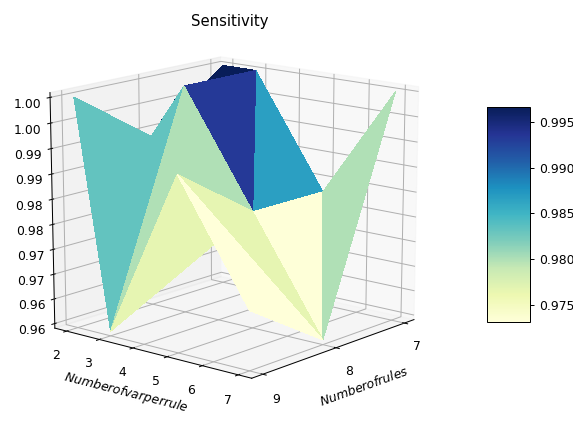

In [145]:
#plot 3D
%matplotlib notebook



X = data_frame_treated['N rule']
Y = data_frame_treated['N var per rule']
Z = data_frame_treated['acc']

y_axis_values = range(math.floor(min(Y)), math.ceil(max(Y))+1)
x_axis_values = range(math.floor(min(X)), math.ceil(max(X))+1)


fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z,  cmap=cm.YlGnBu, linewidth=0, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
ax.set_xticks(x_axis_values, minor=False)
ax.set_yticks(y_axis_values, minor=False)

ax.set_xlabel('$Number of rules$')
ax.set_ylabel('$Number of var per rule$')


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Sensitivity')
plt.show()

![](./img/nVarNRules.png)

This plot shows that the best sensitivity is achieved with between 7 and 8 rules and between 2 and 3 variables per rules. That is the values we are going to explore further.

### Refining the number of rules and number of variables per rule
This experience serves only for tuning even further the two parameters. These range are usefull because they will create more models that we will be able to use to find a good one.

In [41]:
#Var per rule and number of rules

#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/n_rules_nvar_tuning/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules_nvar_tuning.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules_var_tuning'
#--------------------


model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#rule we want to test along our experience 
#--------------------
rules_number_vec = [7,8]
var_per_rule_vec = [2,3]
#--------------------

for variation_a in rules_number_vec:
    for variation_b in var_per_rule_vec:
        model_train_obj.number_rule = variation_a
        model_train_obj.var_per_rule = variation_b
        model_train_obj.execute_cv()

save end
save end
save end
save end
save end
(5, 7)
(5, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  1.  1.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0. 15.]]
[['experiences/n_rules_nvar_tuning/exps_lab_lfa_number_of_rules_var_tuning_conf_A_CV_0_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar_tuning/exps_lab_lfa_number_of_rules_var_tuning_conf_A_CV_1_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar_tuning/exps_lab_lfa_number_of_rules_var_tuning_conf_A_CV_2_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar_tuning/exps_lab_lfa_number_of_rules_var_tuning_conf_A_CV_3_rule_7_var_per_rule_2.ftt']
 ['experiences/n_rules_nvar_tuning/exps_lab_lfa_number_of_rules_var_tuning_conf_A_CV_4_rule_7_var_per_rule_2.ftt']]
save end
save end
save end
save end
save end
(10, 7)
(10, 1)
[[ 7.  2.  0.  5.  0.  0. 15.]
 [ 7.  2.  1.  2.  0.  0. 18.]
 [ 7.  2.  2.  1.  1.  0. 18.]
 [ 7.  2.  3.  4.  0.  0. 16.]
 [ 7.  2.  4.  4.  0.  0

### Aggregate the models
Here we put together every previously created models in order to analyse them and choose the best.

In [150]:
#Filter sen/spe
#read all csv
dataframe_results = pd.read_csv('values_number_of_rules.csv')
dataframe_results_b = pd.read_csv('values_number_of_rules_nvar.csv')
dataframe_results_c = pd.read_csv('values_number_of_rules_nvar_tuning.csv')
dataframe_results_d = pd.read_csv('values_rmse_weight_v2.csv')
dataframe_results_e = pd.read_csv('values_sen_spe_weight.csv')

dataframe_results_all = dataframe_results_b.append(dataframe_results)
dataframe_results_all = dataframe_results_all.append(dataframe_results_c)
dataframe_results_all = dataframe_results_all.append(dataframe_results_d)
dataframe_results_all = dataframe_results_all.append(dataframe_results_e)

dataframe_results_all.columns = ['N rule', 'N var per rule','weight','CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']
dataframe_results_all = dataframe_results_all.reset_index(drop=True)

## Model selection
We now have access to a good amount of models. The next task is to their performance to choose the most fitting models among them.

In [153]:
#Plot sent spe all

#Plot all values
#don't forget to turn off the others plotss
vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScores(dataframe_results_all)
#vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScores(data_frame_treated)

plt.scatter(vec_values_sen_spe_models['Sensitivity'],vec_values_sen_spe_models['Specificity'],s=10, marker='o')

plt.title('Threshold sen/spe')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.savefig('ScatterPlot.png')

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()
print('You have {0} models'.format(len(vec_values_sen_spe_models)))


You have 160 models


Here we see we have a total of 160 models. In the next cells, we will filter them based on their performance in order to reduce the number to around 10.

<IPython.core.display.Javascript object>


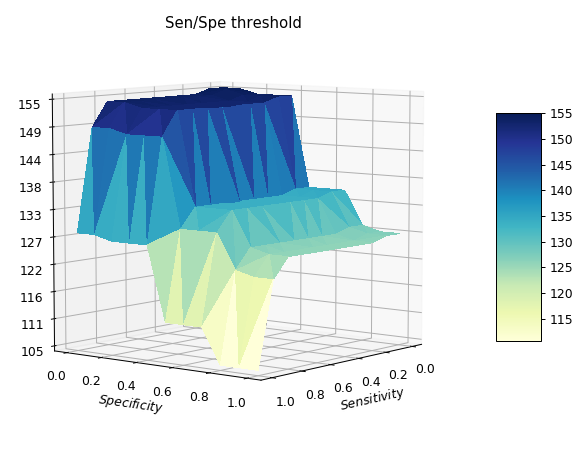

In [146]:
#Plot sen_spe  qty models 3D
#that save x models
%matplotlib notebook

results_qty_models = libraries.interpretability_methods.plotSenSpeQtyModelsByThreshold(vec_values_sen_spe_models)

#display(results_qty_models)

X = results_qty_models['sensitivity']
Y = results_qty_models['specificity']
Z = results_qty_models['qty_models']

#y_axis_values = range(math.floor(min(Y)), math.ceil(max(Y))+1)
#x_axis_values = range(math.floor(min(X)), math.ceil(max(X))+1)

max_quantity = results_qty_models.loc[results_qty_models['qty_models'].idxmax()]
max_quantity = int(max_quantity['qty_models'])

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z.values,  cmap=cm.YlGnBu, linewidth=0, antialiased=False)

#ax.set_zlim(0, max_quantity)
ax.set_zticks(Z)
#ax.set_xticks(x_axis_values, minor=False)
#ax.set_yticks(y_axis_values, minor=False)

ax.set_xlabel('$Sensitivity$')
ax.set_ylabel('$Specificity$')



ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))



fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Sen/Spe threshold')
plt.show()

![](./img/senSpeThres.png)
This plot shows the number of models declining as the specificity and sensitivity raise. It shows that even with a threshold of 1 sensitivity and 1 specificity, we still have more than 100 available models. We will then set the value to 1 and 1.

### Filter by sensitivity / specificity
With the following cells, we filter the remaining models to only keep those with a specificity and sensitivity of 1.

In [109]:
#select values sen spe filtre

#Put a limit in sen/spe
#Here you put the threshold for the sensitivity and specificity
#Don't forget to shave the plot and comment into your repport
#--------------------
value_sensitivity = 1
value_specificity = 1
#--------------------


#We apply them

vec_values_sen_spe_models_filtered = libraries.interpretability_methods.filterDataframeBySenSpeLimit(value_sensitivity, value_specificity, vec_values_sen_spe_models)
vec_values_sen_spe_models_filtered_invert = libraries.interpretability_methods.filterDataframeBySenSpeLimitContrary(value_sensitivity, value_specificity, vec_values_sen_spe_models)


figure = libraries.interpretability_plots.plotDataFrameValuesFiltered(value_sensitivity, value_specificity,vec_values_sen_spe_models_filtered, vec_values_sen_spe_models_filtered_invert)


print('You have {0} models'.format(len(vec_values_sen_spe_models_filtered)))

You have 105 models


We are left with 105 models.

In [111]:

#--------------------
list_models_path_complete = []
for index, row in vec_values_sen_spe_models_filtered.iterrows():
    model_path_complete = "experiences/all_models/" + str(row['file_name'])
    list_models_path_complete.append(model_path_complete)
#--------------------
    
#Perform the counting
list_models_vars = libraries.interpretability_methods.transformModelsToModelVarObj(list_models_path_complete)


You have 105 models and 384 variables


<IPython.core.display.Javascript object>


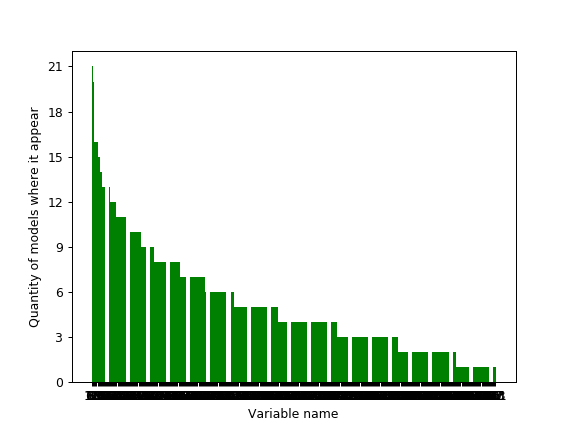

In [154]:
#plot histogram before cut

dict_values_resultant = libraries.interpretability_methods.countVarFreq(list_models_vars)




#indication of the number of models and variables
qty_models = len(list_models_vars)
qty_variables = len(dict_values_resultant)
print("You have {0} models and {1} variables".format(qty_models, qty_variables))

#Plot the new histogram
libraries.interpretability_plots.plotHistogramFreqVar(dict_values_resultant)

![](./img/freq.png)

This plot shows the the quantity of models in which each variable appears. The variable name are not readable with this plot but they can be seen on the next steps.

### Choosing the frequency threshold
Once we know the frequency of each feature, we can filter the ones that appear on the least amount of models. It makes cense because a feature present in a lot of models has higher chance of being a impactful biomarker.  

To do that, we can display a plot that shows the number of models remaining for each minimal frequency of feature.

<IPython.core.display.Javascript object>


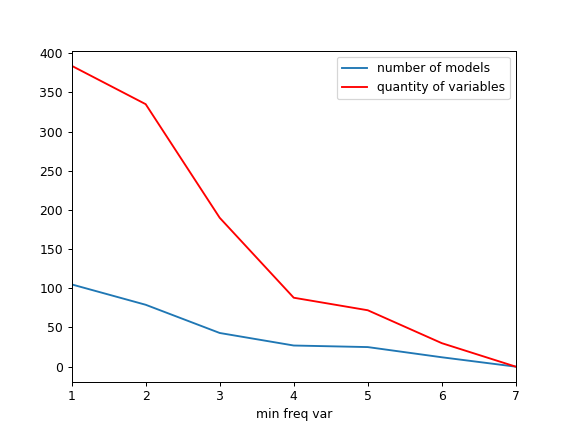

In [148]:
#Perform the counting
list_models_vars = libraries.interpretability_methods.transformModelsToModelVarObj(list_models_path_complete)
dict_values = libraries.interpretability_methods.countVarFreq(list_models_vars)


#TEST zone
matrix_results = libraries.interpretability_methods.createPlotQtyVarPerModelByMinimumFreq(dict_values,list_models_vars)
#display(matrix_results)
#End test zone



ax = plt.figure().gca()

matrix_results.plot(kind='line',x='min freq var',y='number of models',ax=ax)
matrix_results.plot(kind='line',x='min freq var',y='quantity of variables', color='red', ax=ax)

plt.show()

#libraries.interpretability_plots.plotFreqVarPerFreqMinimum(matrix_results)

![](./img/minFreq.png)

With this result we see that a minimum frequency of 7 leaves 0 models. As we want to have a final of around 10 models, a value of minimal frequency of 6 is a good choice as it leaves us with less than 20 models and less than 50 variables.

You have 12 models and 30 variables


<IPython.core.display.Javascript object>


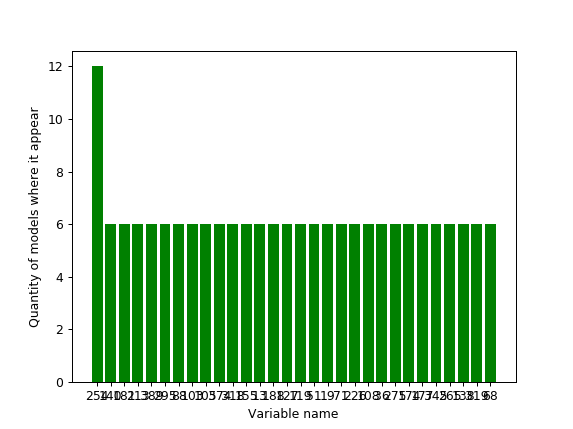

,Variable name,Frequence
0,254,12
1,140,6
2,181,6
3,213,6
4,389,6
5,295,6
6,88,6
7,103,6
8,105,6
9,374,6


In [161]:
#validate the frequency value

#Create a copy of the list that contains the model_var objects
list_models_vars_cpopy = list_models_vars.copy()
#select the minimum frequenty
#--------------------
nb_min_var = 6
#--------------------

#Perform the frequence
list_model_var_resultant = libraries.interpretability_methods.reduceQtyVars(nb_min_var, dict_values,list_models_vars_cpopy)
dict_values_resultant = libraries.interpretability_methods.countVarFreq(list_model_var_resultant)




#indication of the number of models and variables
qty_models = len(list_model_var_resultant)
qty_variables = len(dict_values_resultant)
print("You have {0} models and {1} variables".format(qty_models, qty_variables))

#Plot the new histogram
libraries.interpretability_plots.plotHistogramFreqVar(dict_values_resultant)
#Show the frequency table
dict_Values_ordered = libraries.interpretability_methods.sort_reverse_dictionary_by_values(dict_values_resultant)
datafram_var_freq = pd.DataFrame(list(dict_Values_ordered.items()),columns=['Variable name','Frequence'])
display(datafram_var_freq)


#Perform the list of the models
#--------------------
file_name = 'models_selected.csv'
#--------------------
list_models_names=[model_var.model_path for model_var in list_model_var_resultant]
dataframe_names_files = pd.DataFrame(list_models_names)
dataframe_names_files.to_csv(file_name, sep=',', encoding='utf-8')

![](./img/refFreq.png)

This result shows that the variable 254 is present in all of the selected models. All of the others are present in 6 models.

The previous cell generates a file with each selected model name. We can visualize their performance in order to select the best among them.

## Analysis of the selected models
Now that we have selected the best models, we can visualize their confusion matrices to assess their performance.

<IPython.core.display.Javascript object>


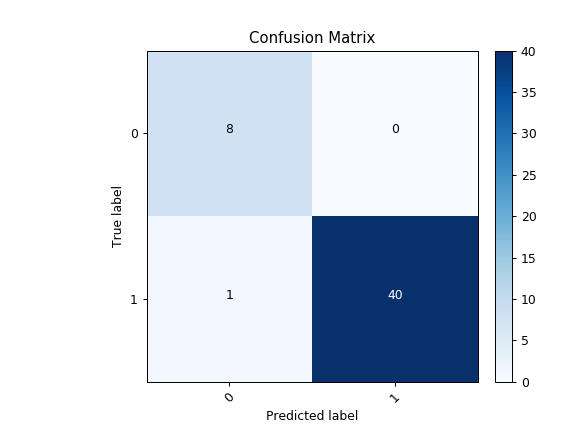

In [159]:
# Import from file
#--------------------
fis = TrefleFIS.from_tff_file("experiences/all_models/experiences/rmse_v2/exps_lab_lfa_rmse_v2_rmse_conf_A_CV_1_rule_5_var_per_rule_5.ftt")
#--------------------
y_pred_test = fis.predict(X_test)

results_list_predictions = np.squeeze(np.asarray(y_pred_test))


#libraries.results_plot.plotCMByTreflePredictions(y_test, results_list_predictions)
#Convert your results into binary values
results = []
for element in y_pred_test:
    if element > 0.5:
        results.append(1)
    else:
        results.append(0)

from libraries.ConfusionMatrix import ConfusionMatrix
cm = confusion_matrix(y_test, results)
n_classes = len(np.unique(y))
ConfusionMatrix.plot(cm, classes=range(n_classes), title="Confusion Matrix")

![](./img/matrix1.png)
exps_lab_lfa_rmse_v2_rmse_conf_A_CV_4_rule_5_var_per_rule_5.ftt

![](./img/matrix2.png)
*exps_lab_lfa_rmse_v2_rmse_conf_A_CV_1_rule_5_var_per_rule_5.ftt*  

These two confusion matrices display selected best models performance. In both of them, only one prediction is wrong. The first one has a false positive and the second one a false negative. As a false negative has a lethal potential for the patient, we can conclude that the first one is the best model to predict a colorectal cancer.


## Conclusion
From the begining of this process, the experiments yielded very high precision results. A lot of the models display a nearly perfect fitness score.  

One reason to explain that would be that the ill patients chosen for the dataset are very far apart from the healthy ones in terms of global health condition. That would mean that some biomarkers could indicate another health problem or else that all the ill patients in the dataset would have taken the same drug.  

Another reason could be that our dataset is comprised of 125 ill patients and 24 healthy ones which is a small number to have a significant statistical power.  

To make sure that the selected models are performant consistantly, we need a bigger and, if the first cited potential reason is correct, more diverse dataset.